In [1]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
#from qiskit.tools.visualization import plot_state_city

from qiskit.providers.aer import StatevectorSimulator

statevector_sim = Aer.get_backend('statevector_simulator')

# Lecture 3 Qiskit Problems
## Problem 1 - Bell State Circuit
Using Qiskit, make a circuit that takes two qubits and maps the standard basis to the Bell basis:
$$
\begin{aligned}
|00\rangle &\mapsto \frac{|00\rangle+|11\rangle}{\sqrt2} \\
|01\rangle &\mapsto \frac{|00\rangle-|11\rangle}{\sqrt2} \\
|10\rangle &\mapsto \frac{|10\rangle+|01\rangle}{\sqrt2} \\
|11\rangle &\mapsto \frac{-|10\rangle+|01\rangle}{\sqrt2} 
\end{aligned}
$$

In [4]:
qc = QuantumCircuit(2)

# --------------------------------
# Enter your code in between these
# --------------------------------
qc.h(0)
qc.cx(0,1)
# --------------------------------
# Enter your code in between these
# --------------------------------


bell_circ = qc.copy()

**Run the next cell to verify if your circuit is correct.**

In [5]:
match = []
tolerance = 1e-4

# Loop over every computational basis state
for i in range(4):
    circ = QuantumCircuit(2)
    # Initialize the qubits
    if (i%2 == 1):
        circ.x(0)
    if (i//2 == 1):
        circ.x(1)
    
    circ.compose(bell_circ,inplace=True)
    
    result = execute(circ, statevector_sim).result()
    statevector = result.get_statevector()
    
    # Flags for whether the output matches the desired output
    if i==0:
        match.append( np.linalg.norm(statevector - np.sqrt(0.5)*np.array([1,0,0,1])) < tolerance )
    elif i==1:
        match.append( np.linalg.norm(statevector - np.sqrt(0.5)*np.array([1,0,0,-1])) < tolerance )
    elif i==2:
        match.append( np.linalg.norm(statevector - np.sqrt(0.5)*np.array([0,1,1,0])) < tolerance )
    elif i==3:
        match.append( np.linalg.norm(statevector - np.sqrt(0.5)*np.array([0,-1,1,0])) < tolerance )
        
correct = True
for m in match:
    correct = correct and m

if correct:
    print("Your circuit is correct, you can move forward.")
else:
    print("Your circuit is not correct, please check your work.")

Your circuit is correct, you can move forward.


## Problem 2 - Quantum Teleportation
Using Qiskit, create a quantum circuit that entangles Alice and Bob's qubits and then uses the entangled pair to teleport another one of Alice's qubit's state to Bob's qubit.

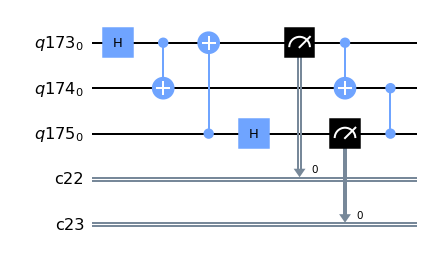

In [23]:
a = QuantumRegister(1) # Alice's qubit that forms half of the entangled pair
b = QuantumRegister(1) # Bob's qubit that forms half of the entangled pair
c = QuantumRegister(1) # Alice's qubit that is to be teleported

# Classical Registers for Alice's measurements
m1 = ClassicalRegister(1)
m2 = ClassicalRegister(1)

qc = QuantumCircuit(a,b,c,m1,m2)

# --------------------------------
# Enter your code in between these
# --------------------------------
qc.h(a)
qc.cx(a,b)
qc.cx(c,a)
qc.h(c)
qc.measure(a,m1)
qc.cx(a,b)
qc.measure(c,m2)
qc.cz(c,b)

qc.draw('mpl')

# --------------------------------
# Enter your code in between these
# --------------------------------

telportation_circ = qc.copy()

**Run the next cell to verify if your circuit is correct**

In [24]:
circ = QuantumCircuit(a,b,c,m1,m2)

# Generate a random vector
random_state = np.random.rand(2)
# Normalize the vector
random_state = random_state / np.linalg.norm(random_state)

# Initialize qubit c to this random vector
circ.initialize(random_state,c)
# Teleport the qubit to Bob
circ.compose(telportation_circ,inplace=True)

result = execute(circ, statevector_sim).result()
final_state = result.get_statevector()

correct = False

# Loop to check all possible post measurement states:
for i in [0,1,4,5]:
    sub_array = np.array([final_state[i],final_state[i+2]])
    if np.linalg.norm(sub_array) != 0:
        if np.linalg.norm(random_state - sub_array) < tolerance:
            correct = True
            break

if correct:
    print("Your circuit is correct, you can move forward.")
else:
    print("Your circuit is not correct, please check your work.")

Your circuit is correct, you can move forward.
